<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Recommender Systems I - Intro to Collaborative Filtering

_Authors: David Yerrington(SF)_

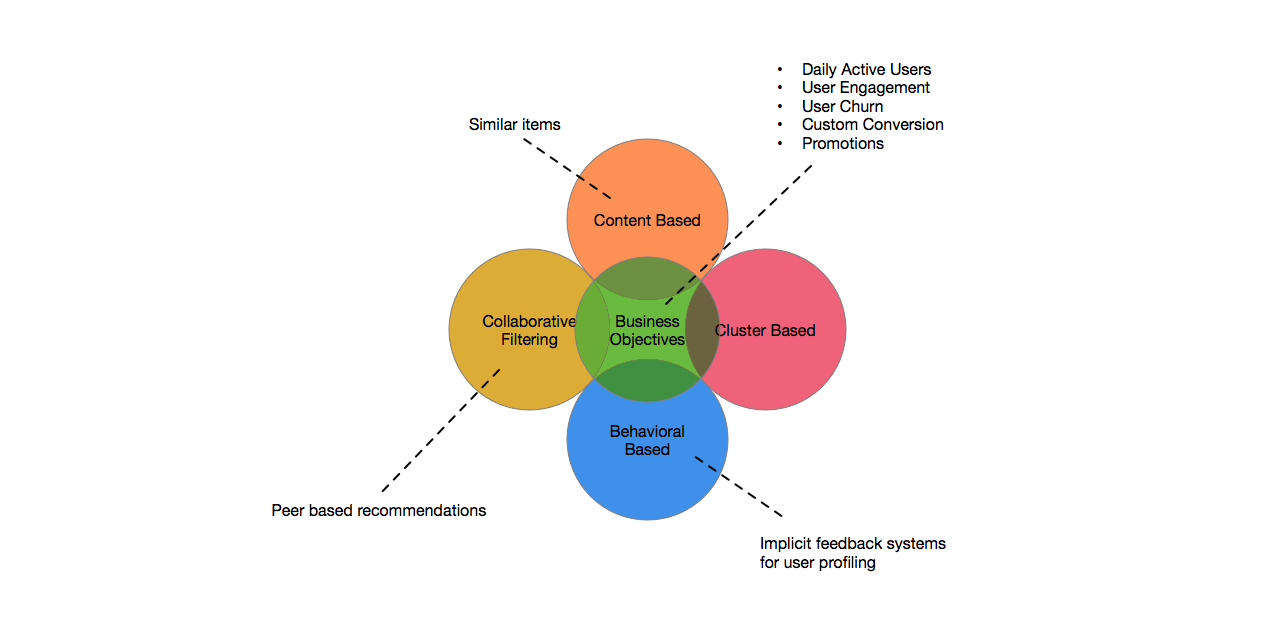

---

<a id="learning-objectives"></a>
### Learning Objectives
*After this lesson, you will be able to:*
- Explain common recommendation techniques
    - Collaborative based
    - Content based
- Types of data used for recommendation, and their tradeoffs
    - Explicit
    - Implicit
- Implement a basic collaborative recommender



# <img src="https://snag.gy/tGMEZo.jpg" style="float: left; width: 25px; margin-right: 5px;"> What exactly is a recommender system (thread)?

* How do they work and what do they seek to accomplish?  
* What kind of data do we need to bake a recommender?

### First, let's talk about data.

In order to make recommendations, there's a bit of expostion that's helpful to understand about data. The kind of recommendations you can give, are dependent on the data you have. 

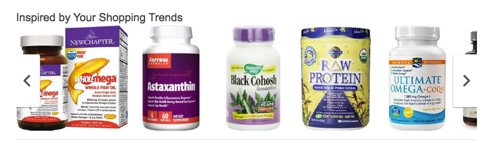

## We need data to recommend!

* Preferences
* Ratings
* Item meta-data
* User Behavior


## More Specific Examples of Data
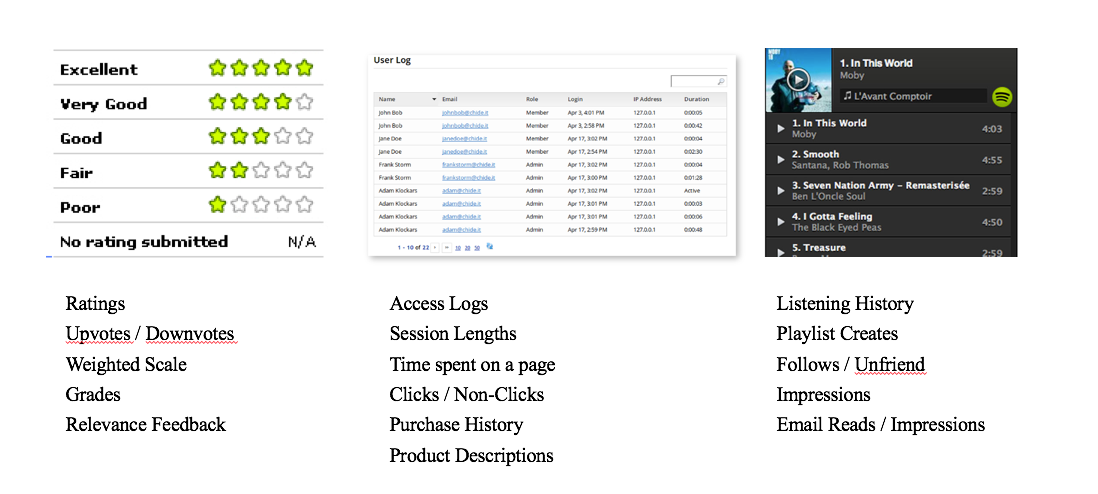

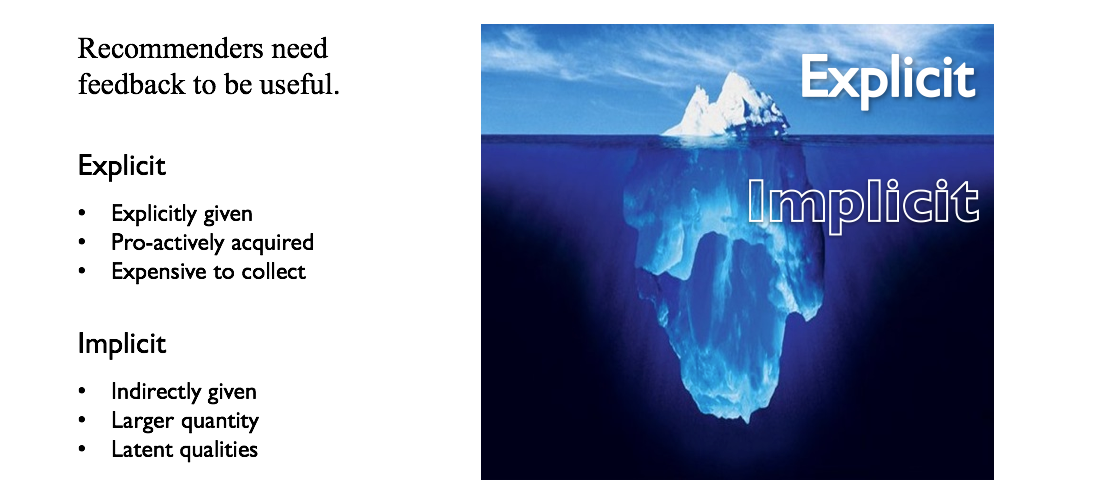

<div style="font-size: 50px; margin: 100px; text-align: center">Explicit or Implicit?</div>

> We will exit our notebooks briefly, and talk a little more about data, then return to write some code!


## Dot Product Review

By now this should be a familiar idea:

# $\vec A\cdot\vec B=A_xB_x+A_yB_y$

Here are a few examples in 2D, with the cooresponding angle, $\theta$, between the two vectors.

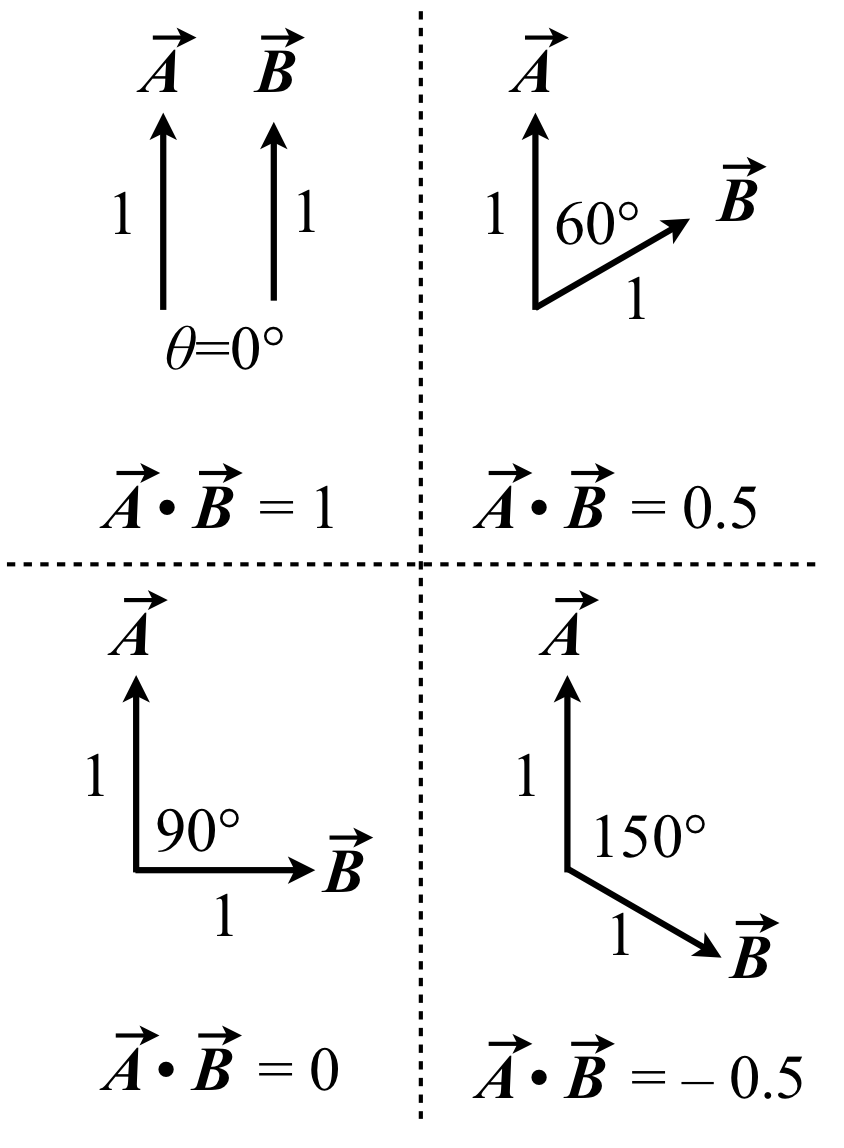

## Distance Metrics: Cosine Similarity

There are many distance metrics we can use to measure similarity between items or users.  One similarity metric we will use a bit in this lesson will bo cosine similarity.

## $$
cos(\theta) = \frac{A \cdot B}{\left\| A\right\| \left\| B\right\| } = \frac{A \cdot B}{\sqrt{\sum{A_i^2}} \cdot \sqrt{\sum{B_i^2}}}
$$


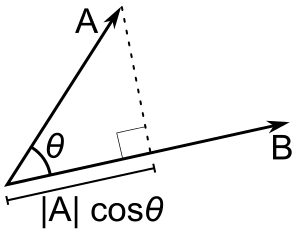

### Literal Example

$$
\vec{A} = \begin{bmatrix}
3 \ 2 \ \text{-}5
\end{bmatrix} \\
\vec{B} = \begin{bmatrix}
5 \ 3 \ \text{-}2
\end{bmatrix}
\\
$$

**The dot product of** $\vec{A} \cdot \vec{B}$

$$
\\
\begin{bmatrix}
3 \\ 2 \\ \text{-}5
\end{bmatrix} 
\cdot 
\begin{bmatrix}
5 \\ 3 \\ \text{-}2
\end{bmatrix}
= (3\times5) + (2\times3) + (-5\times-2) = 31
$$

<br>

**The sqrt of the magnitude of** $\sqrt{\left\| A\right\|}$ **multiplied by sqrt of the magnitude of** $\sqrt{\left\| B\right\|}$

$$
\sqrt{3^2 + 2^2 + \text{-}5^2}\times\sqrt{5^2 + 3^2 + \text{-}2^2} = 37
$$

<br>


> Result is approximate due to rounding decimal.  Check our Python example below for floating precicse cosine similarity.

**Cosine Similarity**

$$
cos(\theta) = \frac{31}{37} = .84
$$


In [61]:
## Cosine Function
def cosine_sim(A, B):
    adotb = np.dot(A, B)
    magscale = np.sqrt(np.dot(A, A)) * np.sqrt(np.dot(B, B))
    return adotb / magscale

A = np.array([3,2,-5])
B = np.array([5,3,-2])

cosine_simple(A, B)

0.81578947368421073

#### sklearn cosine reference

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([A], [B])

array([[ 0.81578947]])

### Similarity on familiar data
Since we've been working with text recently, here's a basic example of applying cosine similarity to text data.

> **d** is closest to **a**.  You can also try changing the offset that gets assigned to _target_.  Try updating the sentence target to offset **2**, sentence **c**.

In [66]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd, numpy as np, seaborn as sns


sentences = [
    ("a", "Matt and Riley hang 10 at the beach"),
    ("b", "Matt rides a skateboard"),
    ("c", "Skateboards are super cool, like Riley"),
    ("d", "Matt and Riley teach at the beach")
]

df = pd.DataFrame(sentences, columns=["sample", "sentence"])
df = df.set_index("sample")

# Setup vectorizer...
vect = CountVectorizer(stop_words=None)
X = vect.fit_transform(df['sentence']).toarray()

df = pd.DataFrame(X, columns=vect.get_feature_names(), index=df.index)
df
# Similarity of sentence "d" to all sentences
# A:


,10,and,are,at,beach,cool,hang,like,matt,rides,riley,skateboard,skateboards,super,teach,the
sample,,,,,,,,,,,,,,,,
a,1,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1
b,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
c,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0
d,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,1


In [8]:
from sklearn.metrics import pairwise_distances

sentences = [
    ("a", "Matt and Justin hang 10 at the beach"),
    ("b", "Matt rides a skateboard"),
    ("c", "Skateboards are super cool, like Riley"),
    ("d", "Matt and Justin teach at the beach")
]

df = pd.DataFrame(sentences, columns=["sample", "sentence"])
df = df.set_index("sample")

# Setup vectorizer...
vect = CountVectorizer(stop_words=None)
X = vect.fit_transform(df['sentence']).toarray()

df = pd.DataFrame(X, columns=vect.get_feature_names(), index=df.index)

pairwise_distances(X, X, metric="euclidean")

array([[ 0.        ,  3.        ,  3.74165739,  1.73205081],
       [ 3.        ,  0.        ,  3.        ,  2.82842712],
       [ 3.74165739,  3.        ,  0.        ,  3.60555128],
       [ 1.73205081,  2.82842712,  3.60555128,  0.        ]])

## Common User-Item Collaborative Filtering:  Binary Preferences

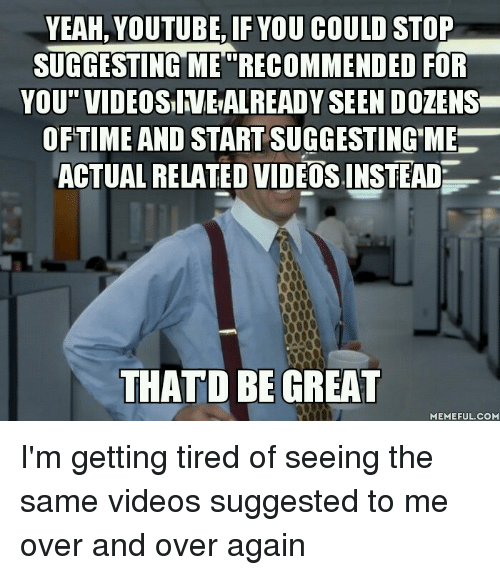

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt, seaborn as sns

from IPython.display import display

%matplotlib inline

In [10]:
users = [
    ("Chuck", 1, 1, 0, 0, 0, 0),
    ("Nancy", 1, 0, 0, 0, 1, 0),
    ("Divya", 0, 0, 0, 1, 1, 1),
    ("Pat", 0, 0, 1, 0, 1, 1),
]

# setup dataframe
users = pd.DataFrame(users, columns=["user", "Friday the 13th", "Nightmare on Elm St", "Dawn of the Dead", "Hiro Dreams of Sushi", "180 South", "Exit Through the Giftshop"])
users = users.set_index("user")
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1,1,0,0,0,0
Nancy,1,0,0,0,1,0
Divya,0,0,0,1,1,1
Pat,0,0,1,0,1,1


### User Similarity

Text(0.5,1,'User Cosine Similarity')

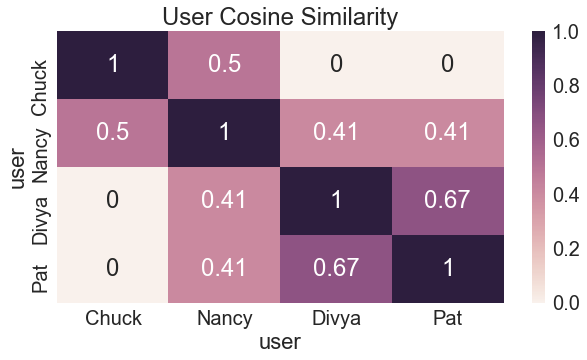

In [11]:
# A: build similarity matrix
sim_matrix = cosine_similarity(users, users)
users_sim = pd.DataFrame(sim_matrix, columns=users.index, index=users.index)

# Plot the matrix
sns.set(font_scale=1) ## Reset the font scale 1st
sns.set(font_scale=2)
plt.figure(figsize=(10,5))
sns.heatmap(users_sim, annot=True)
plt.title("User Cosine Similarity")

### We could make friend recommendations at this point
If we wanted to base our friend suggestions on movie preferences, we could do this.

In [67]:
# A:

In [68]:
# A: Build quick function to look at users sim
top_n_users = lambda user: user

# display("Top Similar Users", top_n_users("Chuck"))
# display("Common Movies", users.T[users.query("index == 'Chuck'").any(0)])

In [71]:
users.query("index == 'Nancy'")

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop,This is Justin Bieber,Nanook of the North,Sharknado: Directors Cut,Snowpiercer: The Musical
user,,,,,,,,,,
Nancy,1,0,0,0,1,0,0,0,0,0


In [75]:
users.query("index == 'Nancy'").any()

Friday the 13th               True
Nightmare on Elm St          False
Dawn of the Dead             False
Hiro Dreams of Sushi         False
180 South                     True
Exit Through the Giftshop    False
This is Justin Bieber        False
Nanook of the North          False
Sharknado: Directors Cut     False
Snowpiercer: The Musical     False
dtype: bool

In [78]:
# Display function outputs
display("Top Similar Users", top_n_users("Nancy"))
# display("Common Movies", users.T[users.query("index == 'Nancy'").any()])


'Top Similar Users'

'Nancy'

In [79]:
# Investigate "Pat"
display("Top Similar Users", top_n_users("Pat"))
# display("Common Movies", users.T[users.query("index == 'Pat'").any(0)])


'Top Similar Users'

'Pat'

### <img src="https://snag.gy/tGMEZo.jpg" style="float: left; width: 25px; margin-right: 5px;">Which movies should we recommend to whom? (thread)
> Does it matter which similarity vector we choose or can all of them be useful in some way?

In [20]:
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1,1,0,0,0,0
Nancy,1,0,0,0,1,0
Divya,0,0,0,1,1,1
Pat,0,0,1,0,1,1


In [21]:
# A: View users Similarity
users_sim

user,Chuck,Nancy,Divya,Pat
user,,,,
Chuck,1.0,0.500000,0.000000,0.000000
Nancy,0.5,1.000000,0.408248,0.408248
Divya,0.0,0.408248,1.000000,0.666667
Pat,0.0,0.408248,0.666667,1.000000


### We'll add a few movies and make _Pat_ watch them AND _like_ them.
In effect, expanding the number of movies that other users haven't seen.

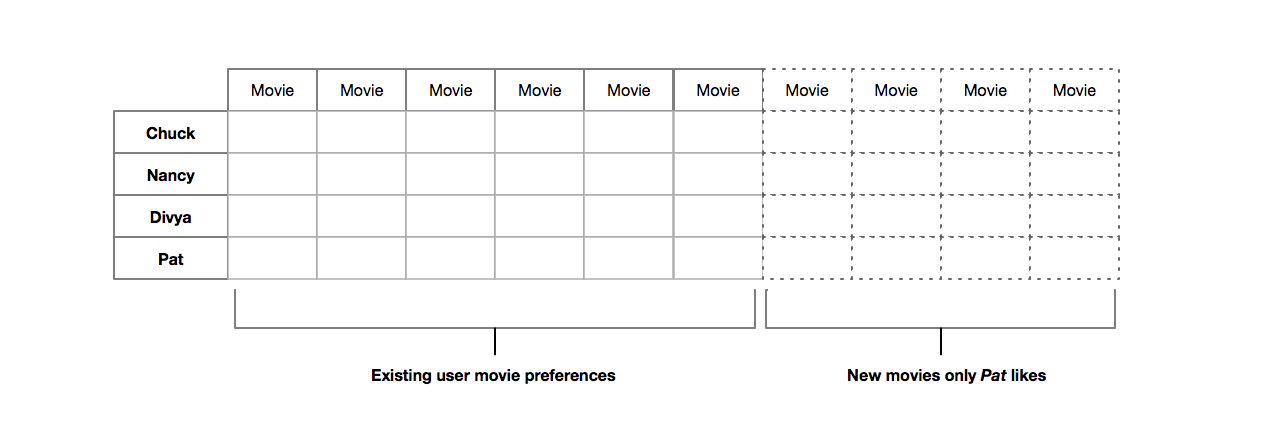

> <img src="https://snag.gy/tGMEZo.jpg" style="float: left; width: 25px; margin-right: 5px;"> However, what might this do to our user similarity space?  What will happen?  Will Divya and Pat still be friends after!? (poll + thread)  <img src="https://snag.gy/5puW28.jpg" style="width: 300px;">

> /poll "After adding more movies (features) to our rating space, how similar will Divya and Pat be as a result?" "Divya will be slightly less similar to Pat because they obviously had similarity before" "They will be less similar however it's still possible Divya and Pat may have the same tastes." "They will be very much the same still, however less is known about Divya with respect to the new movies" anonymous
>
> <img src="https://snag.gy/tGMEZo.jpg" style="float: left ; width: 50px ; margin: -0px 5px 5px 0"> Follow up: /poll "More importantly, do you think it's a good idea to recommend to Divya, what Pat likes before or after expending the movies list?" "Before" "After" "It really shouldn't matter"


In [22]:
# The 4th user is Pat
users['This is Justin Bieber']        =  [0, 0, 0, 1] # Thanks for watching Pat!
users['Nanook of the North']          =  [0, 0, 0, 1] # Thanks for watching Pat!
users['Sharknado: Directors Cut']     =  [0, 0, 0, 1] # Thanks for watching Pat!
users['Snowpiercer: The Musical']     =  [0, 0, 0, 1] # Thanks for watching Pat!
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop,This is Justin Bieber,Nanook of the North,Sharknado: Directors Cut,Snowpiercer: The Musical
user,,,,,,,,,,
Chuck,1,1,0,0,0,0,0,0,0,0
Nancy,1,0,0,0,1,0,0,0,0,0
Divya,0,0,0,1,1,1,0,0,0,0
Pat,0,0,1,0,1,1,1,1,1,1


In [23]:
users_sim = pd.DataFrame(cosine_similarity(users, users), columns=users.index, index=users.index)

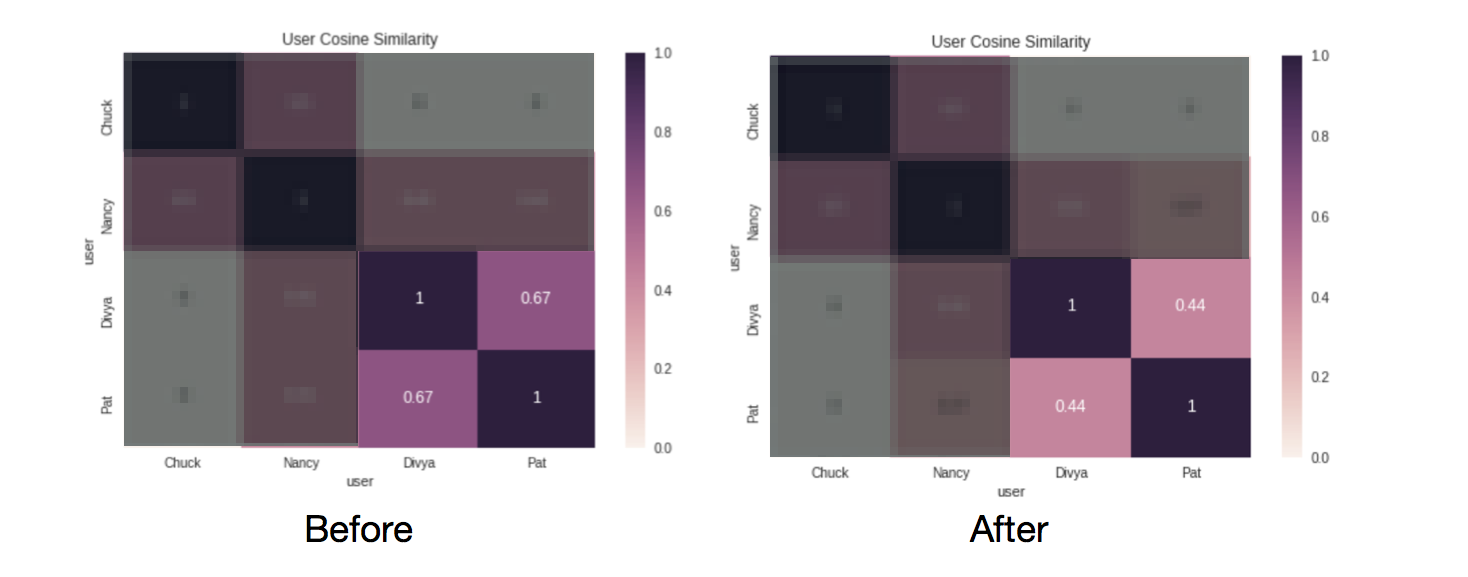

In [80]:
# Display "Divya", after
display("Top Similar Users", top_n_users("Divya"))
# display("Common Movies", users.T[users.query("index == 'Divya'").any(0)])

'Top Similar Users'

'Divya'

## Let's recommend some movies to Divya using this approach.
> Not using anything other than common sense, knowing that Pat and Divya are somewhat similar, which movies should Divya watch?  Also consider what Nancy has liked. (Thread)

We could scale the original preference matrix of 0's and 1's by the values from any vector in the user similarity matrix, then aggregate these projected scores by column to learn which movies are good to recommend based on user similarity. **We are going to code a very basic version of this idea now!**

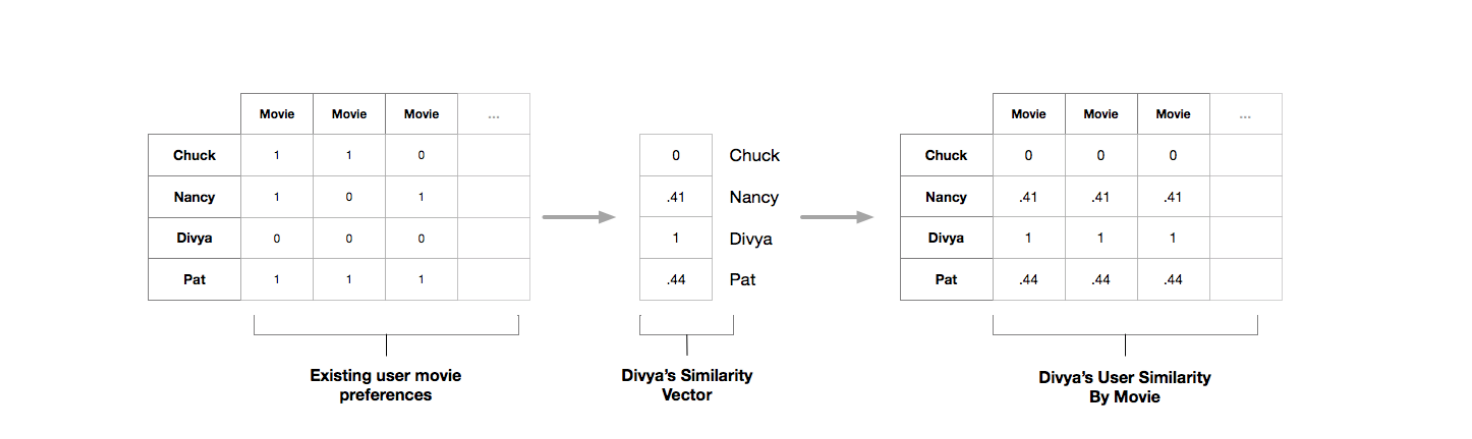

In [37]:
# Scale the user ratings (transpose) by the user similarity vector

In [81]:
# Take the mean, or median

To recommend movies that Divya hasn't seen yet, we can remove the movies she has seen / rated.

In [82]:
# A:

To get the projected preferences of all movies, which may also be useful to know to see how neighbor similarity influences current preferences.

In [83]:
# A: 

### Time permitting

> Anything good or bad about these recs?  Do you think this could work with data that has a rating of say 1-5?  Or standard scaled? (thread)

### Conclusion: Basic Collaborative Filtering
- **Similar** users reduce projected ratings **less**
- **Dissimilar** users reduce projected ratings **more**
- Form of matrix factorization or matrix decomposition
- User similarity is used to reduce the ratings matrix
- There are many forms
  - User to item (Movies recommended for you)
  - User to user (People that watch the same moves as you)
  - Item to item (People who like Snowpiercer also like ...)



### Recommended Reading

* [Evaluation of Item-Based Top-N Recommendation
Algorithms - George Karypis](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.554.1671&rep=rep1&type=pdf)
* [Intro to Collaborative Filtering](http://blog.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/)
* [Winning the Netflix Prize: A Summary](http://blog.echen.me/2011/10/24/winning-the-netflix-prize-a-summary/)